<a href="https://colab.research.google.com/github/Joffreybvn/wine-quality-analysis/blob/master/wine_quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installs & imports

In [1]:
# Dataset download
!wget -N https://raw.githubusercontent.com/Joffreybvn/red-wine-quality-analysis/master/data/winequality-red.csv

--2020-09-24 12:22:47--  https://raw.githubusercontent.com/Joffreybvn/red-wine-quality-analysis/master/data/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.04s   

Last-modified header missing -- time-stamps turned off.
2020-09-24 12:22:47 (2.67 MB/s) - ‘winequality-red.csv’ saved [100951/100951]



In [2]:
!pip install seaborn --upgrade

     |████████████████████████████████| 286kB 2.9MB/s 
  Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1


Packages imports:

In [3]:
# Allow to print multiple output 
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [4]:
#import geopandas as gpd
#import folium
#from scipy import stats

import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

Dataset creation

In [5]:
df = pd.read_csv('/content/winequality-red.csv', sep=',')

# Dataset inspection

## General dataframe diagnostic

In [6]:
df.head()
df.shape

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


(1599, 12)

Check missing values

In [7]:
df.count()
#df.isna().count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

It seems that there's no missing values. Let's drop the duplicates




In [8]:
df.drop_duplicates(inplace=True)

In [9]:
 df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


# Analysis

## Univariate: Quality - The target

### Quality observations

Take a look at the quality variable and its distribution.

In [10]:
# Math the Mode, Median and Mean
mean = df['quality'].mean()
median = df['quality'].median()
mode = df['quality'].mode()[0]

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, 'Quality')

Text(0, 0.5, 'Wine observations')

Mean: 6 - Median: 6 - Mode: 5


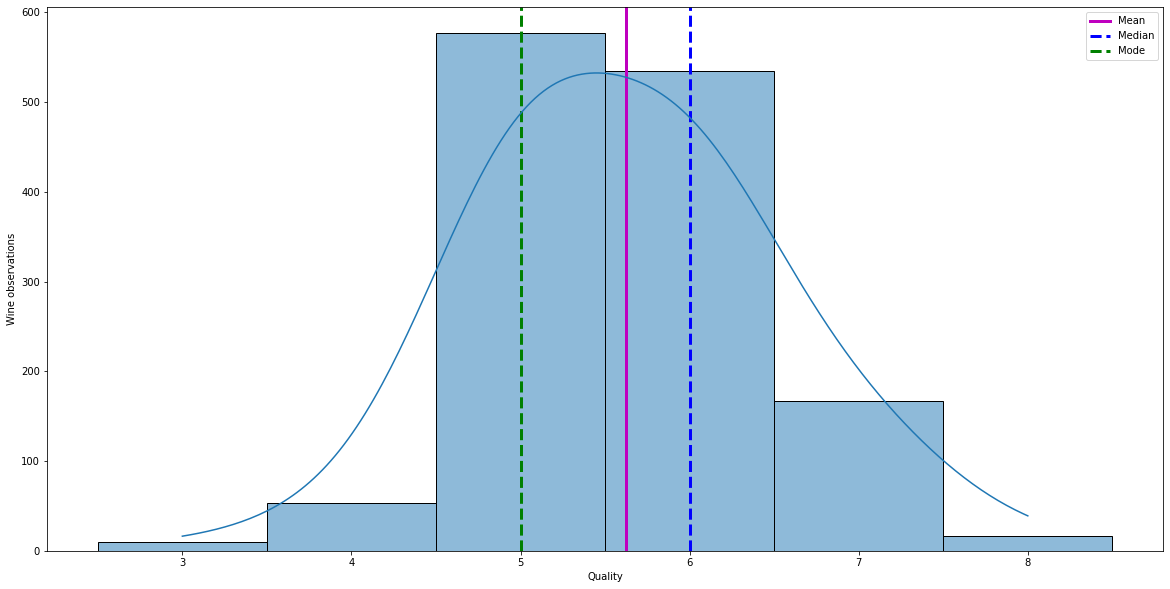

In [59]:
# Resize the graph size
plt.figure(figsize=(20,10))
plt.ticklabel_format(style='plain', axis='x')

plt.axvline(mean, color='m', linewidth=3,label='Mean')
plt.axvline(median, color='b', linestyle='dashed', linewidth=3,label='Median')
plt.axvline(mode, color='g', linestyle='dashed', linewidth=3,label='Mode')

# Label the axis
plt.xlabel('Quality')
plt.ylabel('Wine observations')
plt.legend()

# Show the graph
sns.histplot(data=df, x="quality", kde=True, kde_kws={'bw_adjust': 3}, discrete=True)
print(f"Mean: {round(mean)} - Median: {round(median)} - Mode: {round(mode)}")

# plt.savefig('quality.svg', dpi=300, bbox_inches='tight')

### Kurtosis & skewness

The graph seems a bit right skewed

In [12]:
skew = df['quality'].skew()
kurtosis = df['quality'].kurt()

print(f"Skew: {skew} - Kurtosis: {kurtosis}")

Skew: 0.19240658731658308 - Kurtosis: 0.3402560880620915


The data are a little bit skewed and kurtosed, but this won't influence the analysis.

### Outliers

The outliers seems distributed equally. We won't remove them.

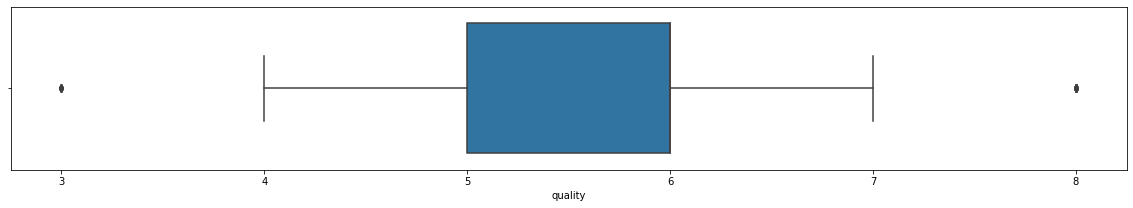

In [13]:
# Print the outliers horizontally
plt.figure(figsize=(20,3))
sns.boxplot(x=df["quality"]);

## Bivariate: Heatmap

Take a look at Heatmap to find correlations bewteen Quality and other variables.

(<Figure size 1440x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f48075a6e48>)

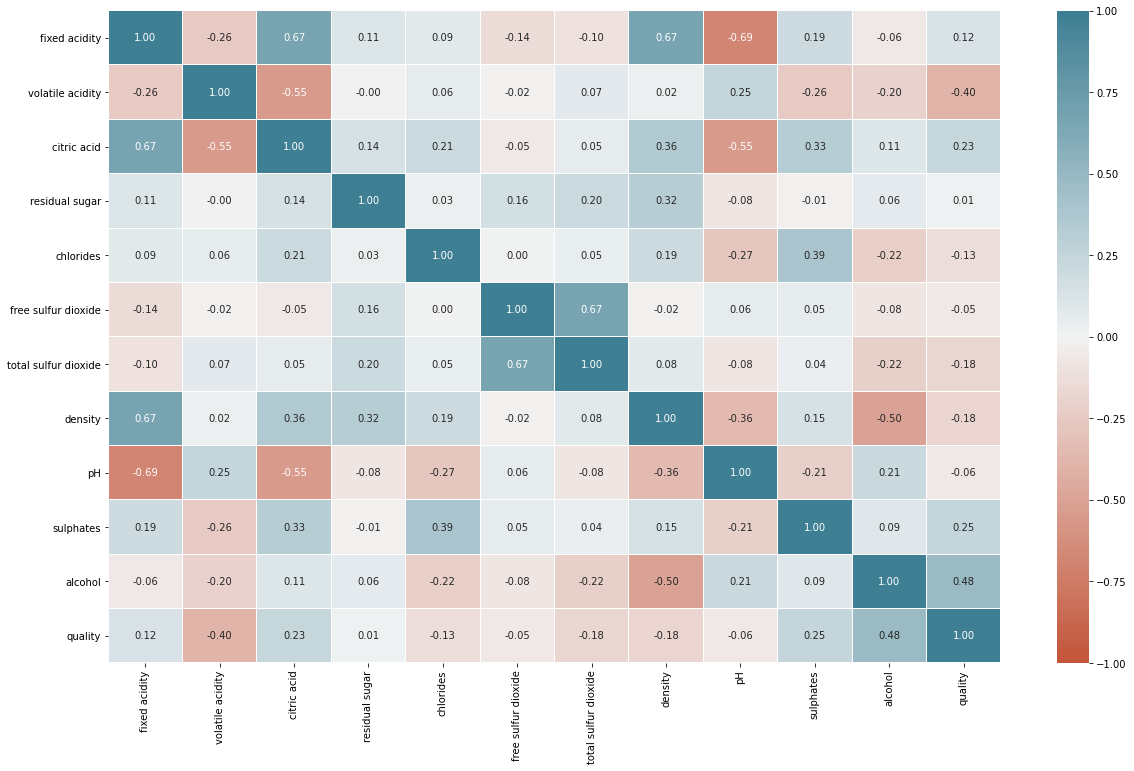

In [60]:

# Print the heatmap
plt.subplots(figsize=(20, 12))   
sns.heatmap(df.corr(), annot=True, linewidths=0.05, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200))

#plt.savefig('heatmap.svg', dpi=300, bbox_inches='tight')
plt.show()

**Observations**:
-  Quality with **Alcohol** High
-  Quality with **Volatile acidity** High
-  Quality with **Citric Acid** Low
-  Quality with **Sulphates** Low



- Volatile Acidity with **Citric acid** High
- Volatile Acidity with **Fixed acidity** Low
- Volatile Acidity with **Sulphates** Low
- Volatile Acidity with **ph** Low


- Fixed acidity with **ph** High
- Fixed acidity with **Citric Acid** High
- Fixed acidity with **Density** High


- Citric Acid with **ph** High
- Citric Acid with **Density** Medium
- Citric Acid with **Sulphates** Low


- Residual Sugar with **density** Medium
- Residual Sugar with **total sulfur oxide** Low
- Residual Sugar with **free sulfur oxide** Low


- Chorides with **sulphates** Medium 

### Quality influences

#### with Alcohol

See the correlation index

In [15]:
df['quality'].corr(df['alcohol'])

0.48034289800199176

Displaying the relation:

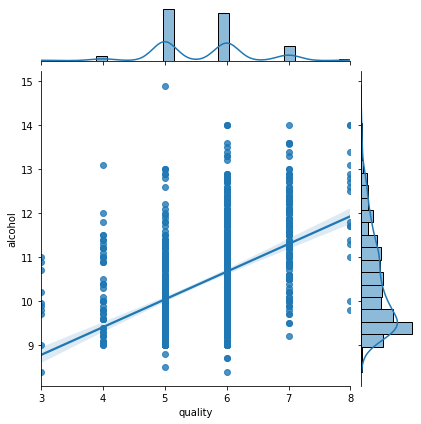

In [16]:
sns.jointplot(data=df, x="quality", y="alcohol", kind="reg")

The alcohol distribution seems right skewed: The majority of the wines has around 9 degress of alcohol.

Trend: **The more alcohol in the wine, the better is the quality**.

#### with Volatile acidity

See the correlation index

In [17]:
df['quality'].corr(df['volatile acidity'])

-0.39521368900984055

Displaying the relation:

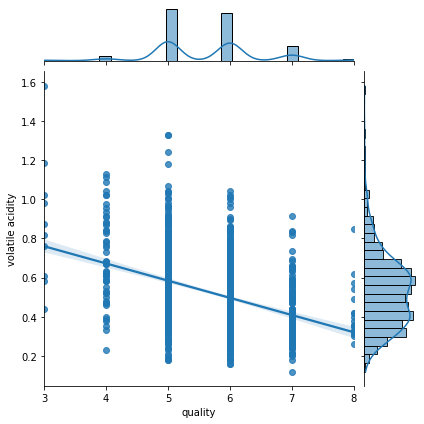

In [18]:
sns.jointplot(data=df, x="quality", y="volatile acidity", kind="reg")

This variable seems to have less influence on the wine quality.

Trend: **Less volatile acidity increase the wine quality**.

#### with Sulphates

Correlation index

In [19]:
df['quality'].corr(df['sulphates'])

0.2488351355778882

The correlation is weak. Displaying it:

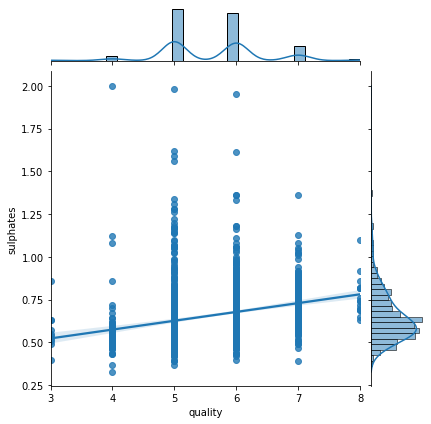

In [20]:
sns.jointplot(data=df, x="quality", y="sulphates", kind="reg")

This variable seems to have very few influence.

Trend: **More sulphates increase the wine quality**.

#### with citric Acid

Correlation index

In [21]:
df['quality'].corr(df['citric acid'])

0.22805745919929968

The correlation is weak. Displaying it:

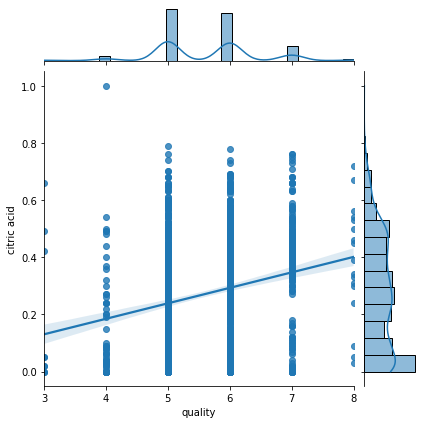

In [22]:
sns.jointplot(data=df, x="quality", y="citric acid", kind="reg")

This variable seems to have very few influence.

Trend: **More citric acid increase the wine quality**.

### Alcohol influence

#### with density

Check the correlation

In [23]:
df['alcohol'].corr(df['density'])

-0.5049949308081072

Displaying it

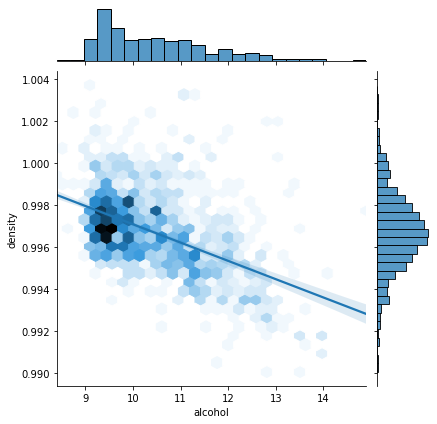

In [24]:
g = sns.jointplot(data=df, x="alcohol", y="density", kind="hex")
sns.regplot(data=df, x="alcohol", y="density", scatter=False, ax=g.ax_joint)

This variable seems to have some influence.

Trend: **A smaller density mean more alcohol**.

#### with Total sulfur dioxide

In [25]:
df['alcohol'].corr(df['total sulfur dioxide'])

-0.21782895607671407

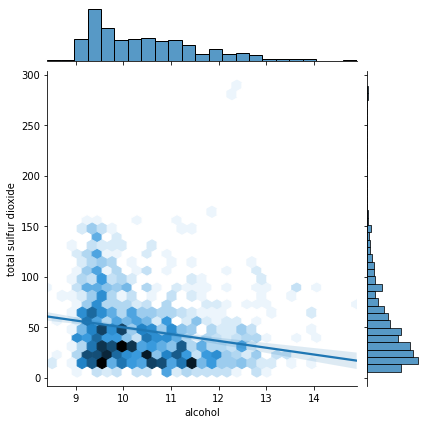

In [26]:
g = sns.jointplot(data=df, x="alcohol", y="total sulfur dioxide", kind="hex")
sns.regplot(data=df, x="alcohol", y="total sulfur dioxide", scatter=False, ax=g.ax_joint)

This correlatio is weak, but the alcohol is the variable total sulfur dioxid influence the most.

### Density influence

#### with Fixed acidity

Check the correlation

In [27]:
df['density'].corr(df['fixed acidity'])

0.6701950166538061

The correlation seems quite strong ! Display it:

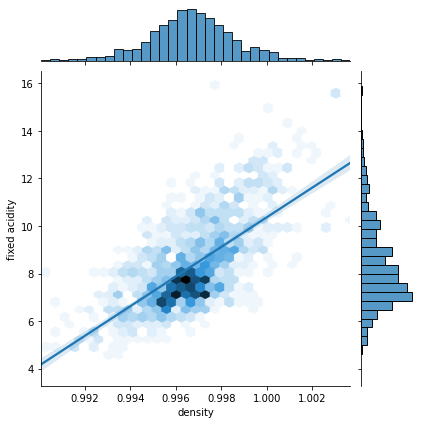

In [28]:
g = sns.jointplot(data=df, x="density", y="fixed acidity", kind="hex")
sns.regplot(data=df, x="density", y="fixed acidity", scatter=False, ax=g.ax_joint)

This variable seems to have a lot of influence.

Trend: **More acidity = More density**.

#### with Citric acid

Check correlation

In [29]:
df['density'].corr(df['citric acid'])

0.35796188864682293

The correlation is not very strong. Display it:

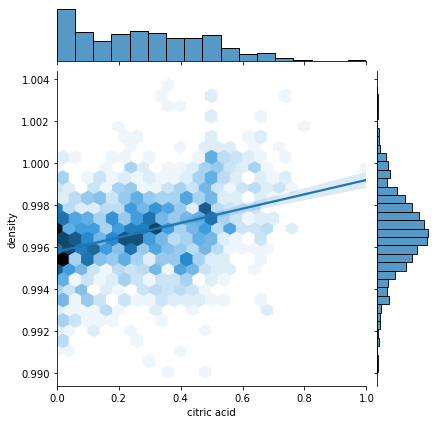

In [30]:
g = sns.jointplot(data=df, x="citric acid", y="density", kind="hex")
sns.regplot(data=df, x="citric acid", y="density", scatter=False, ax=g.ax_joint)

This variable seems to have few or **unclear influence**.

Trend: **More citric acid = A bit more density**

#### with ph

In [31]:
df['density'].corr(df['pH'])

-0.3556173591754367

The correlation is not very strong. Display it:

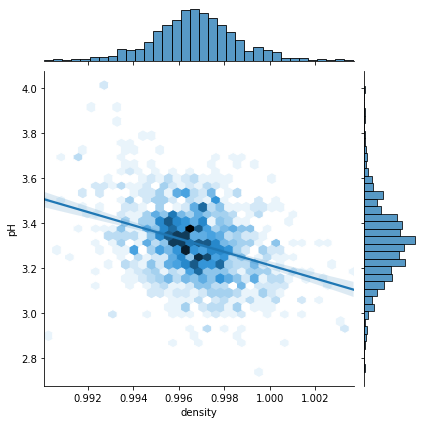

In [32]:
g = sns.jointplot(data=df, x="density", y="pH", kind="hex")
sns.regplot(data=df, x="density", y="pH", scatter=False, ax=g.ax_joint)

#### with Residual sugar

In [33]:
df['density'].corr(df['residual sugar'])

0.3245224835402511

Correlation not very strong. Display the relation:

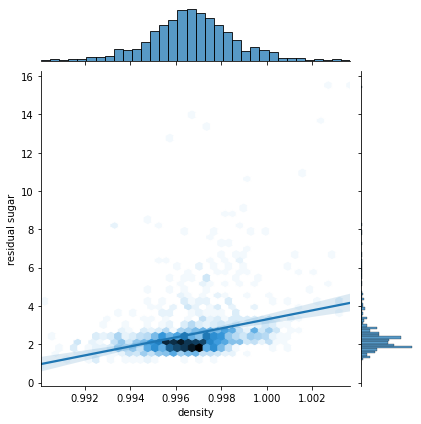

In [34]:
g = sns.jointplot(data=df, x="density", y="residual sugar", kind="hex")
sns.regplot(data=df, x="density", y="residual sugar", scatter=False, ax=g.ax_joint)

Trend: **More sugar mean more density.**

### Volatile acidity influence


Small volatile acidity means better wine quality.

#### with Citric acid

In [35]:
df['volatile acidity'].corr(df['citric acid'])

-0.5512480416642105

The correlation seems strong. Display it:

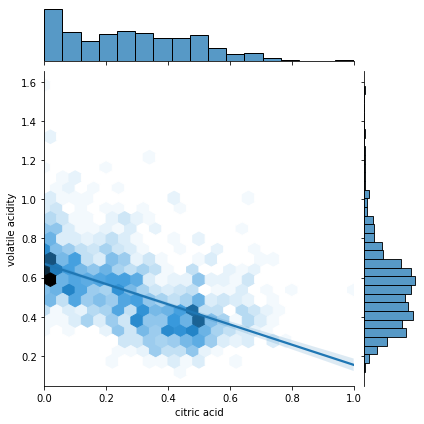

In [36]:
g = sns.jointplot(data=df, y="volatile acidity", x="citric acid", kind="hex")
sns.regplot(data=df, y="volatile acidity", x="citric acid", scatter=False, ax=g.ax_joint)

Trend: **More citric acid means less volatile acidity**.

#### with Sulfates

In [37]:
df['volatile acidity'].corr(df['sulphates'])

-0.2569477706502988

The correlation seems quite weak, display it:

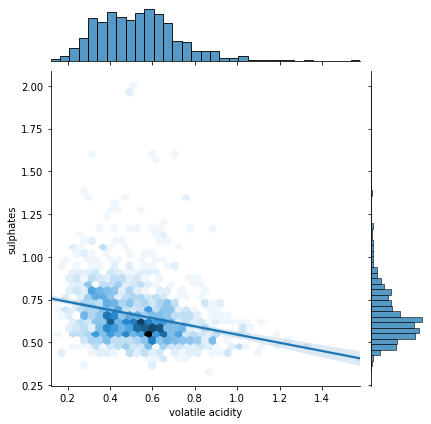

In [38]:
g = sns.jointplot(data=df, x="volatile acidity", y="sulphates", kind="hex")
sns.regplot(data=df, x="volatile acidity", y="sulphates", scatter=False, ax=g.ax_joint)

Trend: **More sulphates means less volatile acidity**.

### Citric acid influence

Hypothesis: More citric acid means better wine

#### with Fixed acidity

In [39]:
df['fixed acidity'].corr(df['citric acid'])

0.6674373845302903

The correlation seems very strong. Display it:

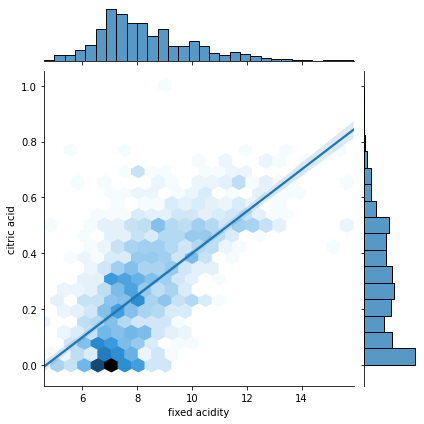

In [40]:
g = sns.jointplot(data=df, x="fixed acidity", y="citric acid", kind="hex")
sns.regplot(data=df, x="fixed acidity", y="citric acid", scatter=False, ax=g.ax_joint)

#### with Density

In [41]:
df['citric acid'].corr(df['density'])

0.357961888646823

The correlation is not very strong, display it:

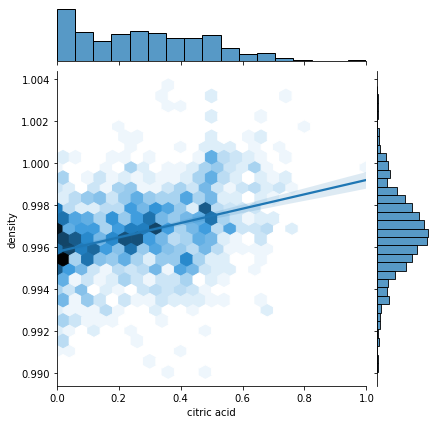

In [42]:
g = sns.jointplot(data=df, y="density", x="citric acid", kind="hex")
sns.regplot(data=df, y="density", x="citric acid", scatter=False, ax=g.ax_joint)

**More citric acid means more density**.

#### with Sulphates

In [43]:
df['citric acid'].corr(df['sulphates'])

0.3260623332275639

Correlation is not very strong, display it:

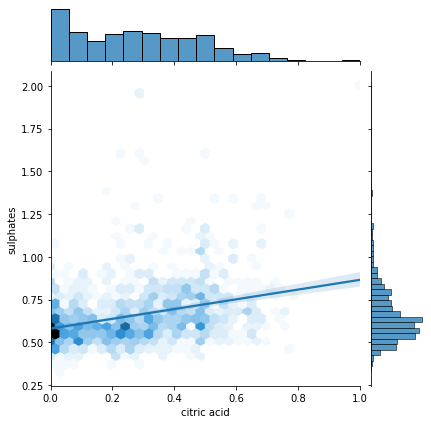

In [44]:
g = sns.jointplot(data=df, y="sulphates", x="citric acid", kind="hex")
sns.regplot(data=df, y="sulphates", x="citric acid", scatter=False, ax=g.ax_joint)

### Chlorides influence

#### with Sulphates

In [45]:
df['chlorides'].corr(df['sulphates'])

0.39455721871130045

Correlation is not very strong, display it:

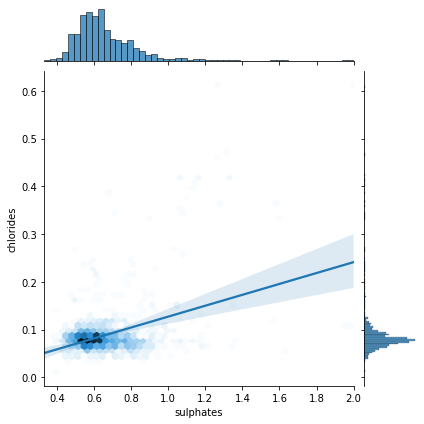

In [46]:
g = sns.jointplot(data=df, x="sulphates", y="chlorides", kind="hex")
sns.regplot(data=df, x="sulphates", y="chlorides", scatter=False, ax=g.ax_joint)

#### with Alcohol

In [47]:
df['chlorides'].corr(df['alcohol'])

-0.2238236627696536

Correlation is weak, display it

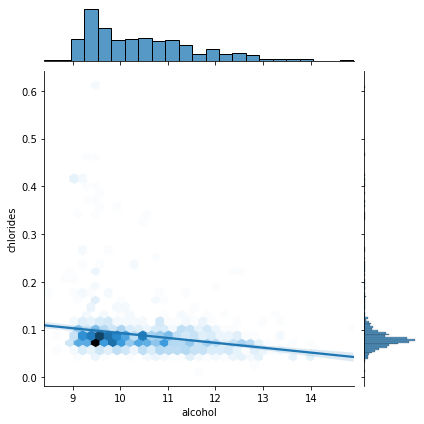

In [48]:
g = sns.jointplot(data=df, x="alcohol", y="chlorides", kind="hex")
sns.regplot(data=df, x="alcohol", y="chlorides", scatter=False, ax=g.ax_joint)

# Interpretation

## Five better wines

In [65]:
df.sort_values('quality', ascending=False).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.99730,3.35,0.86,12.8,8
588,5.0,0.42,0.24,2.0,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.99870,2.88,0.82,9.8,8
1090,10.0,0.26,0.54,1.9,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
1269,5.5,0.49,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.0,8


## Five worst wines

In [66]:
df.sort_values('quality', ascending=True).head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1299,7.6,1.580,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9,3
517,10.4,0.610,0.49,2.1,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
1478,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3
832,10.4,0.440,0.42,1.5,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
1469,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.7,3
